In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

# Load the dataset
file_path = './datasets/banana_quality.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Calculate Z-scores
z_scores = stats.zscore(data.drop('Quality', axis=1))
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(data[outliers])

data_selected = data[~outliers]
numerical_cols = data_selected.drop('Quality', axis=1).columns.values

le = LabelEncoder()

X = data_selected.drop('Quality', axis=1)
y = le.fit_transform(data_selected['Quality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

          Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
40   -2.148932  0.372681   5.752867 -1.286756    -1.778054  0.609732   
103   0.349277  1.068333   5.115295 -1.086893    -0.956476  0.452616   
106   0.438483  1.334073   6.211078 -1.237290    -0.658108  2.181343   
182  -1.828168  0.996649   5.360637 -1.321495    -1.546096 -0.329171   
189   0.250269  2.426638   5.986969  2.090100    -0.578864 -1.025476   
...        ...       ...        ...       ...          ...       ...   
7522  2.736667 -1.927756  -4.307352  1.213925     0.338275 -6.392600   
7553 -0.034316 -2.921958  -5.893079  1.524119     1.552202 -5.818229   
7655  0.936073 -8.283002  -4.327517  1.805262    -3.020747 -4.524598   
7750  1.562603 -1.099128  -2.444837  1.487009     1.299293 -5.783597   
7876  2.177507 -4.962810  -3.659430  1.569804    -0.599212 -6.092226   

       Acidity Quality  
40    2.496089    Good  
103   3.244548    Good  
106   1.419293    Good  
182   0.402788    Good  
189   4.65

In [8]:
quality_counts = data['Quality'].value_counts()
print(quality_counts)

Quality
Good    4006
Bad     3994
Name: count, dtype: int64


Logistic Regression: Accuracy = 0.878, Precision = 0.881, Recall = 0.886, F1 = 0.884


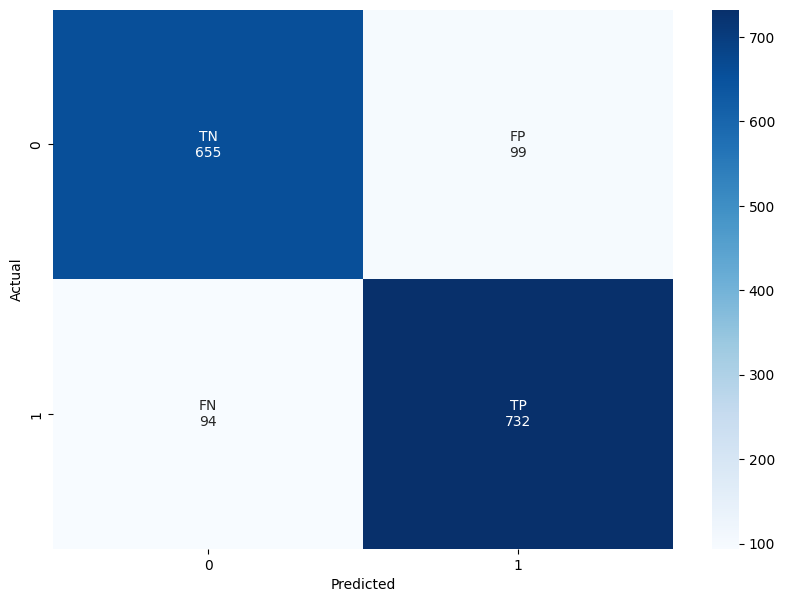

In [17]:
# Create a Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)

# Calculate metrics for Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_precision = precision_score(y_test, logreg_predictions)
logreg_recall = recall_score(y_test, logreg_predictions)
logreg_f1 = f1_score(y_test, logreg_predictions)

print("Logistic Regression: Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1 = %.3f" % (logreg_accuracy, logreg_precision, logreg_recall, logreg_f1))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, logreg_predictions)

# Define the labels
labels = ['TN','FP','FN','TP']
labels = np.asarray(labels).reshape(2,2)

# Combine labels and confusion matrix values
labels = (np.asarray(["{0}\n{1}".format(label, value)
                      for label, value in zip(labels.flatten(), cnf_matrix.flatten())])
         ).reshape(2,2)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:


# Create a Support Vector Classifier model
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)

# Calculate metrics for Support Vector Classifier
svc_accuracy = accuracy_score(y_test, svc_predictions)
svc_precision = precision_score(y_test, svc_predictions)
svc_recall = recall_score(y_test, svc_predictions)
svc_f1 = f1_score(y_test, svc_predictions)

print("Support Vector Classifier: Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1 = %.3f" % (svc_accuracy, svc_precision, svc_recall, svc_f1))

Support Vector Classifier: Accuracy = 0.984, Precision = 0.987, Recall = 0.983, F1 = 0.985


In [11]:

# Create a Random Forest Classifier model
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_predictions = rfc_model.predict(X_test)

# Calculate metrics for Random Forest Classifier
rfc_accuracy = accuracy_score(y_test, rfc_predictions)
rfc_precision = precision_score(y_test, rfc_predictions)
rfc_recall = recall_score(y_test, rfc_predictions)
rfc_f1 = f1_score(y_test, rfc_predictions)

print("Random Forest Classifier: Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1 = %.3f" % (rfc_accuracy, rfc_precision, rfc_recall, rfc_f1))

Random Forest Classifier: Accuracy = 0.968, Precision = 0.969, Recall = 0.970, F1 = 0.969
